# CREATOR-> SARTHAK ARORA

# TASK->8 = NEXT_WORD_PREDICTOR

Dataset link-> https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

In [ ]:
#Importing tensorflow and keras for RNN model.

In [1]:
#Importing packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [22]:
paath = "C:\\Users\\saart\\OneDrive\\Desktop\\Astram\\LGMVIP\\Advanced\\TASK-8\\sample text\\1661-0.txt"
t = open(paath,encoding = "utf8").read()
print('Length:', len(t))

Length: 581888


In [9]:
ch = sorted(list(set(t)))
char = dict((c, i) for i, c in enumerate(ch))
indices = dict((i, c) for i, c in enumerate(ch))
print(f'Unique: {len(ch)}')

Unique: 73


In [11]:
seq_len = 50
step = 4
sentences = []
next = []
for i in range(0, len(t) - seq_len, step):
    sentences.append(t[i: i + seq_len ])
    next.append(t[i + seq_len])
print(f'Number training : {len(sentences)}')

Number training : 145460


In [17]:
X = np.zeros((len(sentences), seq_len, len(ch)), dtype=np.bool)
y = np.zeros((len(sentences), len(ch)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char[char]] = 1
    y[i, char[next[i]]] = 1
sentences[110]
next_chars[90]

C:\Users\saart\AppData\Local\Temp\ipykernel_5156\2265201287.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(sentences), seq_len, len(ch)), dtype=np.bool)
C:\Users\saart\AppData\Local\Temp\ipykernel_5156\2265201287.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(ch)), dtype=np.bool)


TypeError: string indices must be integers

In [13]:
X[0][0]
y[0]
X.shape
y.shape

(145460, 73)

In [16]:
model = Sequential()
model.add(LSTM(130, input_shape=(seq_len, len(ch))))
model.add(Dense(len(ch)))
model.add(Activation('softmax'))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 130)               106080    
                                                                 
 dense_2 (Dense)             (None, 73)                9563      
                                                                 
 activation_2 (Activation)   (None, 73)                0         
                                                                 
Total params: 115,643
Trainable params: 115,643
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Training our model
optimizer = RMSprop(learning_rate=0.02)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.02, batch_size=130, epochs=4, shuffle=True).history

Epoch 1/4
1097/1097 [==============================] - 126s 111ms/step - loss: 0.0000e+00 - accuracy: 9.1196e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/4
1097/1097 [==============================] - 116s 106ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/4
1097/1097 [==============================] - 108s 98ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/4
1097/1097 [==============================] - 116s 105ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [23]:
#saving our model
model.save('NW_keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

In [24]:
#model loading
model = load_model('NW_keras_model.h5')
his = pickle.load(open("history.p","rb"))

In [25]:
#Model Evaluation
loss = model.evaluate(X,y)
print("Loss-Testing", loss[0])
print("Accuracy-Testing", loss[1])

4546/4546 [==============================] - 76s 17ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Loss-Testing 0.0
Accuracy-Testing 0.0


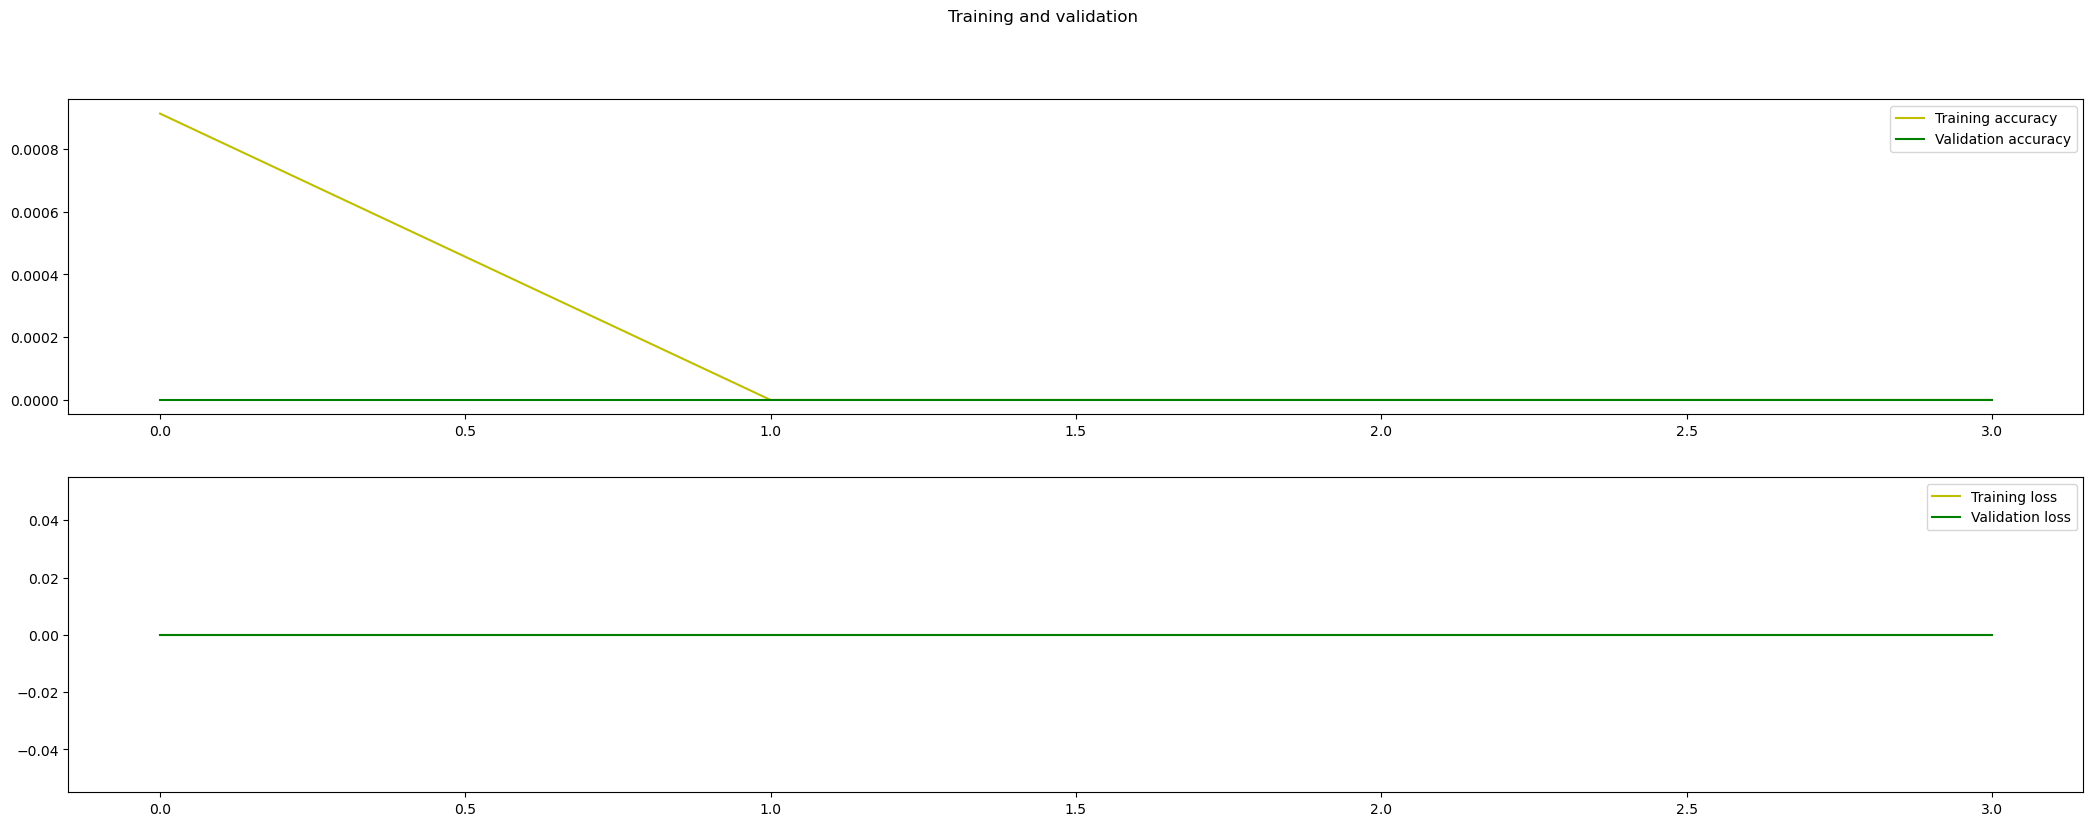

In [33]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(26, 9))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)
plt.suptitle('Training and validation')
plt.show()

In [28]:
#PREDICTION
quotes = [   
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "Machine learning  is the study of computer algorithms that improve automatically through experience and by the use of data.",
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.",
    "Thanks for spending your precious time to view my work."    
]

In [34]:
for q in quotes:
    seq = q[:10]
    print(seq)
    print()

Deep learn

Machine le

It is not 

Recurrent 

Thanks for

